In [1]:
__author__ = "@Tssp"
__date__   = "03/11/21"
import numpy as np
import matplotlib.pyplot as plt
import os
from utils.atomic_units import ao, vo, e, hbar, me, Eh, to
from decimal import Decimal
from utils.Energies_Analysis_utils import *
from matplotlib.ticker import AutoMinorLocator
plt.rc('text',usetex=True)
plt.rc('font',family='serif')
ref_ticksize = 16
plt.rcParams['xtick.labelsize']=ref_ticksize
plt.rcParams['ytick.labelsize']=ref_ticksize
plt.rcParams['legend.fontsize']=ref_ticksize
plt.rcParams['axes.labelsize']=ref_ticksize * 3/2
plt.rcParams['axes.titlesize']=ref_ticksize * 3/2
aur = (1 + np.sqrt(5)) / 2
aursize = (5*aur, 5)

In [2]:
delta = np.loadtxt('Simulations/delta_asc.dat', dtype=str)[:,0]
asc = np.loadtxt('Simulations/delta_asc.dat')[:,1]
delta = delta.tolist()
asc = asc.tolist()

In [3]:
# Parameters and Constants:
mass  = 7.0160040 * 1.66053873e-27 / me # a.u
alpha = 200 # a.u
lambd = 1000 * 1e-9 / ao # a.u
ky    = 2*np.pi/lambd
Iy    = 4993 * (1e4 / Eh * to * ao**2)
Vy    = alpha * Iy # a.u
Iy    = Vy/alpha
wy    = np.sqrt( 2 * Vy * ky**2 / mass)       
dho   = np.sqrt(2 / (mass * wy))
print('wy [u.a]: ', wy/to)
print('dho [u.a]: ', dho)

wy [u.a]:  2141065.2804475287
dho [u.a]:  1737.6709708894564


In [4]:
print(os.getcwd())
folder_path = "Simulations/ix4993_LiLi/config/"

/Users/tomy/PhD/Ultracold_Atoms_src/Analysis/q2dq3d


In [5]:
Data = list()
delta_nonreaded = list()
for d in delta:
    try:
        Data.append(np.loadtxt(folder_path + f'Li7Li7_x18000_y18000_z18000_140rm8g2l60m8_80CM8g1L60M16_LiLi_a3Sup_0{d}_Li7Li7_nx6ny6nz6_nx6ny6nz6_ix4993iy4993iz4993_ix4993iy50iz50/Ag_B1u_vsLiLi3d1d_rm250_CM50_ddb.eva'))
    except:
        delta_nonreaded.append(d)
        continue
print(f'There are a few folders without data, \ndelta={delta_nonreaded} non readed')

There are a few folders without data, 
delta=['.70205', '.70210', '.70215', '.70220', '.70225', '.70230', '.70235', '.70240', '.70245', '.70316', '.70556', '.70557', '.70558', '.70559', '.70561', '.70562', '.70563', '.70564', '.70566', '.70567', '.70568', '.70569', '.70571', '.70572', '.70573', '.70574', '.70576', '.70577', '.70578', '.70579', '.70581', '.70582', '.70583', '.70584', '.70586', '.70587', '.70588', '.70589', '.70591', '.70592', '.70593', '.70594', '.70596', '.70597', '.70598', '.70599', '.70601', '.70602', '.70603', '.70604', '.70606', '.70607', '.70608', '.70609', '.70611', '.70612', '.70613', '.70614', '.70616', '.70617', '.70618', '.70619', '.70621', '.70622', '.70623', '.70624', '.70626', '.70627', '.70628', '.70629', '.70631', '.70632', '.70633', '.70634', '.70636', '.70637', '.70638', '.70639', '.70641', '.70642', '.70643', '.70644', '.70646', '.70647', '.70648', '.70649', '.70651', '.70652', '.70653', '.70654', '.70656', '.70657', '.70658', '.70659', '.70661', '.70

In [6]:
# Delete from original delta and asc lists the unreaded values:
for dnr in delta_nonreaded:
    idx = delta.index(dnr)
    del delta[idx], asc[idx]
assert len(delta) == len(asc)
print("filtering completed")
x = dho / asc

filtering completed


In [7]:
dic = transpose_energies(Data)

In [8]:
least_bound_pos = 2050

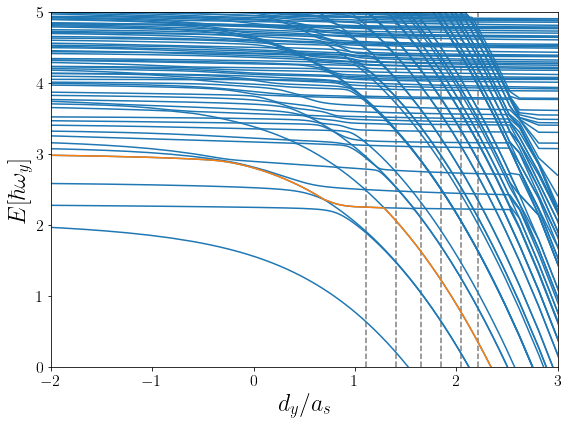

In [9]:
fig, ax = plt.subplots(figsize=(8,6))
for i in range(least_bound_pos, least_bound_pos + 100):
    ax.plot(x, dic['nivel_{}'.format(i)]/wy, 'C0')
ax.plot(x, dic['nivel_2053']/wy, 'C1')
ax.set_ylim(0, 5)
ax.set_xlim(-2, 3)
ax.vlines(x[158], 0, 10, alpha=0.5, linestyles='--', color='k')
ax.vlines(x[128], 0, 10, alpha=0.5, linestyles='--', color='k')
ax.vlines(x[103], 0, 10, alpha=0.5, linestyles='--', color='k')
ax.vlines(x[83], 0, 10, alpha=0.5, linestyles='--', color='k')
ax.vlines(x[63], 0, 10, alpha=0.5, linestyles='--', color='k')
ax.vlines(x[46], 0, 10, alpha=0.5, linestyles='--', color='k')
ax.set_xlabel('$d_{y}/a_s$')
ax.set_ylabel('$E[\hbar \omega_{y}]$')
plt.tight_layout()
#fig.savefig('Results/Figures/Ix4993_LiLi_3d_2d_Easc.png', dpi=200)
plt.show()

In [10]:
%matplotlib inline

In [11]:
print(f'''To find the eigenstates:
x={x[158]}, delta=0{delta[158]}
x={x[128]}, delta=0{delta[128]}
x={x[103]}, delta=0{delta[103]}
x={x[83]}, delta=0{delta[83]}
x={x[63]}, delta=0{delta[63]}
x={x[46]}, delta=0{delta[46]}
''')

To find the eigenstates:
x=1.1093654038713099, delta=0.70975
x=1.4087084519246929, delta=0.70825
x=1.655740694128729, delta=0.70700
x=1.8518107118323281, delta=0.70600
x=2.0465192587369625, delta=0.70500
x=2.2109655380775526, delta=0.70415



## Resonance x<1

In [16]:
%matplotlib inline

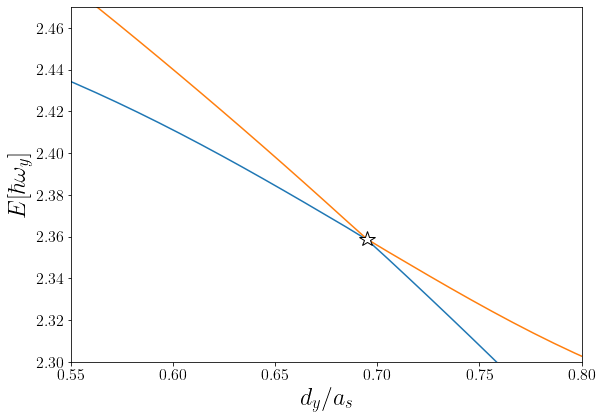

In [17]:
fig, ax = plt.subplots(figsize=(8,6))
ax.plot(x, dic['nivel_2052']/wy, 'C0')
ax.plot(x, dic['nivel_2053']/wy, 'C1')
ax.set_ylim(0, 5)
#ax.set_xlim(-4, 4)
ax.set_xlabel('$d_{y}/a_s$')
ax.set_ylabel('$E[\hbar \omega_{y}]$')
ax.plot(0.695023, 2.35863, 'w*', markersize=16, markeredgecolor='k')
plt.tight_layout()
plt.xlim(0.55, 0.8)
plt.ylim(2.3, 2.47)
#fig.savefig('Results/Figures/Ix7802_LiLi_3d_2d_Easc.png', dpi=200)
plt.show()

In [22]:
print(f'''Crosses between (x, E):
* trap-(0,2,0): {0.695023, 2.35863}''')

Crosses between (x, E):
* trap-(0,2,0): (0.695023, 2.35863)


In [20]:
print(f'''Crosses between (x, E):
* trap-(0,2,0): ({1/0.695023})''')

Crosses between (x, E):
* trap-(0,2,0): (1.4388013058560654)


## Resonance x>1

2052
2053
2054
2055
2056
2057
2058
2059
2060
2061
2062
2063
2064
2065
2066
2067
2068
2069


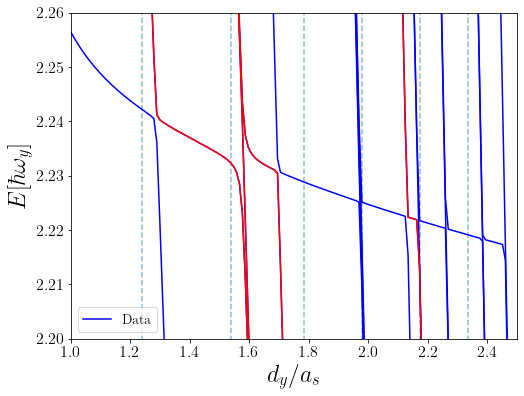

In [17]:
fig2, ax2 = plt.subplots(figsize=(8,6))
xpol = np.linspace(x[0], x[-1], num=50)
for i in range(least_bound_pos+2, least_bound_pos + 20):
    print(i)
    ax2.plot(x, dic['nivel_{}'.format(i)]/wy, 'b')
ax2.plot(x, dic['nivel_2054'.format(i)]/wy, 'r')
ax2.plot(x, dic['nivel_2055'.format(i)]/wy, 'r')
ax2.plot(x, dic['nivel_2056'.format(i)]/wy, 'r')
ax2.plot(x, dic['nivel_2062'.format(i)]/wy, 'r')
ax2.vlines(x[145], 0, 10, alpha=0.5, linestyles='--')
ax2.vlines(x[115], 0, 10, alpha=0.5, linestyles='--')
ax2.vlines(x[90], 0, 10, alpha=0.5, linestyles='--')
ax2.vlines(x[70], 0, 10, alpha=0.5, linestyles='--')
ax2.vlines(x[50], 0, 10, alpha=0.5, linestyles='--')
ax2.vlines(x[33], 0, 10, alpha=0.5, linestyles='--')
ax2.set_ylim(2.2, 2.26)
ax2.set_xlim(1, 2.5)
ax2.set_xlabel('$d_{y}/a_s$')
ax2.set_ylabel('$E[\hbar \omega_{y}]$')
ax2.legend(['Data'], fontsize=14)
plt.show()

In [13]:
print('''f Eigenstates:
2053: trap
2054: (2,0,0) ICIR
2055: (0,0,4)
2056: (0,4,0) ICIR
2057: (0,2,2)
2058: (2,0,2)
2059: (2,2,0)
2060: (0,0,6)
2061: 
2062: (4,0,0) ICIR
''')

f Eigenstates:
2053: trap
2054: (2,0,0) ICIR
2055: (0,0,4)
2056: (0,4,0) ICIR
2057: (0,2,2)
2058: (2,0,2)
2059: (2,2,0)
2060: (0,0,6)
2061: 
2062: (4,0,0) ICIR



In [14]:
%matplotlib inline

# (2,0,0) (0,2,0)

2.0154418149107403e-14
[0.0, -8.75258064088156 + 0.e-22*I, 1.29162091422597 - 0.e-22*I, 13.1131734913962 - 0.e-20*I]
Write the position of the correct solution: 2
[0.0, -8.75258064088156 + 0.e-22*I, 1.29162091422597 - 0.e-22*I, 13.1131734913962 - 0.e-20*I]
Write the position of the correct solution: 2
[0.0, -10.2220528406398 + 0.e-22*I, 1.58018433592514 - 0.e-22*I, 14.2940822694553 - 0.e-20*I]
Write the position of the correct solution: 2
[0.0, -10.2220528406398 + 0.e-22*I, 1.58018433592514 - 0.e-22*I, 14.2940822694553 - 0.e-20*I]
Write the position of the correct solution: 2
[0.0, -11.4743245982188 + 0.e-22*I, 2.14002035558964 + 0.e-22*I, 14.9865180073697 - 0.e-22*I]
Write the position of the correct solution: 2
[0.0, -11.4743245982188 + 0.e-22*I, 2.14002035558964 + 0.e-22*I, 14.9865180073697 - 0.e-22*I]
Write the position of the correct solution: 2


(1.1, 2.2)

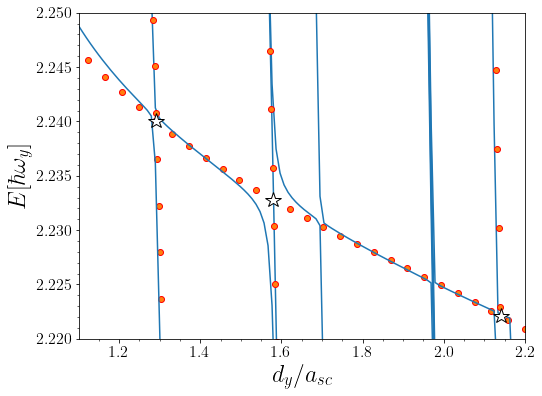

In [35]:
fig3, ax3 = plt.subplots(figsize=(8,6))
# nivel 2053:
trap_poly = trap_fit(dic, x, x_lims=(1.1, 1.6), y_lims=(2.22, 2.25) ,levels=(2053, 2062), tol=1, wy=wy)/wy
x2053 = np.linspace(1, 2.2, num=30)
ax3.scatter(x2053, np.polyval(trap_poly, x2053), edgecolor='r', facecolor='C1', label='Diabatic', zorder=1)
ax3.plot(x, dic['nivel_2053']/wy, 'C0', label='Adiabatic', zorder=2)

# nivel 2054:
ax3.plot(x, dic['nivel_2054']/wy, 'C0', zorder=1)
f2054 = np.polyfit(x[(x < 1.3) & (x > 1.1)], np.array(dic['nivel_2054'])[(x < 1.3) & (x > 1.1)]/wy, deg=1)
x2054 = np.linspace(1.25, 1.31, num=20)
ax3.scatter(x2054, np.polyval(f2054, x2054), edgecolor='r', facecolor='C1', zorder=2)

# nivel 2055:
ax3.plot(x, dic['nivel_2055']/wy, 'C0', zorder=1)
f2055 = np.polyfit(x[(x < 1.6) & (x > 1.5)], np.array(dic['nivel_2055'])[(x < 1.6) & (x > 1.5)]/wy, deg=1)
x2055 = np.linspace(1.55, 1.61, num=20)
ax3.scatter(x2055, np.polyval(f2055, x2055), edgecolor='r', facecolor='C1', zorder=2)

# nivel 2056:
ax3.plot(x, dic['nivel_2056']/wy, 'C0', zorder=1)

# nivel 2057:
ax3.plot(x, dic['nivel_2057']/wy, 'C0', zorder=1)

# nivel 2058:
ax3.plot(x, dic['nivel_2058']/wy, 'C0', zorder=1)

# nivel 2059:
ax3.plot(x, dic['nivel_2059']/wy, 'C0', zorder=1)


# nivel 2060:
ax3.plot(x, dic['nivel_2060']/wy, 'C0', zorder=1)

# nivel 2061:
ax3.plot(x, dic['nivel_2061']/wy, 'C0', zorder=1)

# nivel 2062:
ax3.plot(x, dic['nivel_2062']/wy, 'C0', zorder=1)
f2062 = np.polyfit(x[(x < 2.14) & (x > 2)], np.array(dic['nivel_2062'])[(x < 2.14) & (x > 2)]/wy, deg=1)
x2062 = np.linspace(2, 2.18, num=50)
ax3.scatter(x2062, np.polyval(f2062, x2062), edgecolor='r', facecolor='C1', zorder=2)

# Crosses:
##########
ax3.plot(cross_points(trap_poly, f2054), np.polyval(trap_poly, sp.re(cross_points(trap_poly, f2054))), 'w*', markersize=16, markeredgecolor='k', label='ICIR')
ax3.plot(cross_points(trap_poly, f2055), np.polyval(trap_poly, sp.re(cross_points(trap_poly, f2055))), 'w*', markersize=16, markeredgecolor='k', label='ICIR')
ax3.plot(cross_points(trap_poly, f2062), np.polyval(trap_poly, sp.re(cross_points(trap_poly, f2062))), 'w*', markersize=16, markeredgecolor='k', label='ICIR')



# States:
#########
#ax3.annotate(r'$\left|\psi^{(1)} \Phi_{(0,0,0)}\right>$', xy=(1.25, 2.534), xytext=(1.25, 2.536), fontsize=14, 
#             bbox=dict(boxstyle="round", alpha=0.3, facecolor='C1'),
#             arrowprops=dict(arrowstyle="wedge, tail_width=0.5", alpha=0.3, facecolor='C1'))
#
#ax3.annotate(r'$\left|\psi^{(b)} \Phi_{(0,2,0)}\right>$', xy=(1.20, 2.5382), xytext=(1.22, 2.5382), fontsize=14, 
#             bbox=dict(boxstyle="round", alpha=0.3, facecolor='C1'),
#             arrowprops=dict(arrowstyle="wedge, tail_width=0.5", alpha=0.3, facecolor='C1'))
#
#ax3.annotate(r'$\left|\psi^{(b)} \Phi_{(0,0,4)}\right>$', xy=(1.05, 3.355), xytext=(0.74, 3.36), fontsize=14, 
#             bbox=dict(boxstyle="round", alpha=0.3, facecolor='C1'),
#             arrowprops=dict(arrowstyle="wedge, tail_width=0.5", alpha=0.3, facecolor='C1'))
#
#ax3.annotate(r'$\left|\psi^{(b)} \Phi_{(2,0,0)}\right>$', xy=(1.20, 2.5382), xytext=(1.13, 2.5382), fontsize=14, 
#             bbox=dict(boxstyle="round", alpha=0.3, facecolor='C1'),
#             arrowprops=dict(arrowstyle="wedge, tail_width=0.5", alpha=0.3, facecolor='C1'))

ax3.set_xlabel('$d_{y}/a_{sc}$')
ax3.set_ylabel('$E[\hbar \omega_{y}]$')
ax3.xaxis.set_minor_locator(AutoMinorLocator())
ax3.yaxis.set_minor_locator(AutoMinorLocator())
ax3.set_ylim(2.22, 2.25)
ax3.set_xlim(1.1, 2.2)
#fig3.savefig('Results/Figures/LiLi_2d3d_4993_Easc_Interpolation.png', bbox_inches="tight", dpi=200)

In [36]:
print(f'''Crosses between (x, E):
* trap-(2,0,0): ({cross_points(trap_poly, f2054)}, {np.polyval(trap_poly, cross_points(trap_poly, f2054))})
* trap-(0,4,0): ({cross_points(trap_poly, f2055)}, {np.polyval(trap_poly, cross_points(trap_poly, f2055))})
* trap-(4,0,0): ({cross_points(trap_poly, f2062)}, {np.polyval(trap_poly, cross_points(trap_poly, f2062))})
''')

[0.0, -8.75258064088156 + 0.e-22*I, 1.29162091422597 - 0.e-22*I, 13.1131734913962 - 0.e-20*I]
Write the position of the correct solution: 2
[0.0, -8.75258064088156 + 0.e-22*I, 1.29162091422597 - 0.e-22*I, 13.1131734913962 - 0.e-20*I]
Write the position of the correct solution: 2
[0.0, -10.2220528406398 + 0.e-22*I, 1.58018433592514 - 0.e-22*I, 14.2940822694553 - 0.e-20*I]
Write the position of the correct solution: 2
[0.0, -10.2220528406398 + 0.e-22*I, 1.58018433592514 - 0.e-22*I, 14.2940822694553 - 0.e-20*I]
Write the position of the correct solution: 2
[0.0, -11.4743245982188 + 0.e-22*I, 2.14002035558964 + 0.e-22*I, 14.9865180073697 - 0.e-22*I]
Write the position of the correct solution: 2
[0.0, -11.4743245982188 + 0.e-22*I, 2.14002035558964 + 0.e-22*I, 14.9865180073697 - 0.e-22*I]
Write the position of the correct solution: 2
Crosses between (x, E):
* trap-(2,0,0): (1.29162091422597, 2.24000790033798)
* trap-(0,4,0): (1.58018433592514, 2.23277208547599)
* trap-(4,0,0): (2.14002035558

In [39]:
print(f'''Crosses between (x, E):
* trap-(2,0,0): ({1/cross_points(trap_poly, f2054)})
* trap-(0,4,0): ({1/cross_points(trap_poly, f2055)})
* trap-(4,0,0): ({1/cross_points(trap_poly, f2062)})
''')

[0.0, -8.75258064088156 + 0.e-22*I, 1.29162091422597 - 0.e-22*I, 13.1131734913962 - 0.e-20*I]
Write the position of the correct solution: 2
[0.0, -10.2220528406398 + 0.e-22*I, 1.58018433592514 - 0.e-22*I, 14.2940822694553 - 0.e-20*I]
Write the position of the correct solution: 2
[0.0, -11.4743245982188 + 0.e-22*I, 2.14002035558964 + 0.e-22*I, 14.9865180073697 - 0.e-22*I]
Write the position of the correct solution: 2
Crosses between (x, E):
* trap-(2,0,0): (0.774220972257380)
* trap-(0,4,0): (0.632837560318262)
* trap-(4,0,0): (0.467285274828366)

